<a href="https://colab.research.google.com/github/adile04/machine-learning-models/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/bin/bash
!kaggle datasets download shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 31.0MB/s]


In [ ]:
!unzip bank-customer-churn-prediction.zip

Archive:  bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df=df.drop(['RowNumber','Surname','CustomerId'],axis=1)

In [ ]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
X_cat=X.select_dtypes(include=['object','category'])
X_num=X.select_dtypes(include=['number'])

<Axes: xlabel='Exited', ylabel='count'>

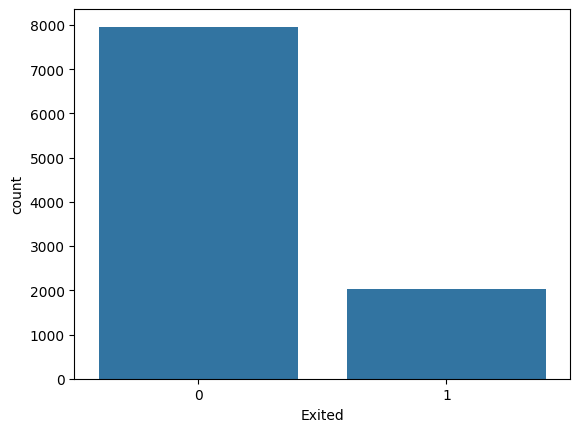

In [ ]:
import seaborn as sns
sns.countplot(x=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
cat_pipeline=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False),
)

In [ ]:
num_pipeline=make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
)

In [ ]:
full_pipeline=ColumnTransformer([
    ('cat',cat_pipeline,list(X_cat.columns)),
    ('num',num_pipeline,list(X_num.columns))
],remainder='drop')

In [ ]:
# X_transformed = pd.DataFrame(full_pipeline.fit_transform(X),columns=full_pipeline.get_feature_names_out())
X_train_transformed = pd.DataFrame(full_pipeline.fit_transform(X_train), columns = full_pipeline.get_feature_names_out())
X_test_transformed = pd.DataFrame(full_pipeline.transform(X_test), columns = full_pipeline.get_feature_names_out())

In [ ]:
#logistic regrssion
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train_transformed,y_train)
y_pred_lr=lr.predict(X_test_transformed)
model.score(X_test_transformed,y_test)

0.811

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f'f1-score is {f1_score(y_test,y_pred_lr,average="macro")}')

f1-score is 0.592826858777705


In [ ]:
#Ridge Regression
from sklearn.linear_model import RidgeClassifier
ridge=RidgeClassifier(alpha=1)
ridge.fit(X_train_transformed,y_train)
y_pred_ridge=ridge.predict(X_test_transformed)
ridge.score(X_test_transformed,y_test)

0.813

In [ ]:
print(f'f1-score is {f1_score(y_test,y_pred_ridge, average="macro")}')

f1-score is 0.5556917783971165


In [ ]:
#SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train_transformed,y_train)
y_pred_sgd=sgd.predict(X_test_transformed)
sgd.score(X_test_transformed,y_test)

0.7975

In [ ]:
print(f'f1-score is {f1_score(y_test,y_pred_sgd,average="macro")}')

f1-score is 0.6312064874876557


In [ ]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_clf=make_pipeline(
    PolynomialFeatures(degree=2),
    LogisticRegression()
)
poly_clf.fit(X_train_transformed,y_train)
poly_clf.score(X_test_transformed,y_test)

0.862

In [ ]:
#Polynomial Ridge Classifier
poly_ridge_clf=make_pipeline(
    PolynomialFeatures(degree=2),
    RidgeClassifier(alpha=1)
)
poly_ridge_clf.fit(X_train_transformed,y_train)
y_pred=poly_ridge_clf.predict(X_test_transformed)
poly_ridge_clf.score(X_test_transformed,y_test)

0.8545

In [ ]:
#SVC classifier
from sklearn.svm import SVC
svc_clf=SVC(probability=True,random_state=42)
svc_clf.fit(X_train_transformed,y_train)
y_pred_svc=svc_clf.predict(X_test_transformed)
svc_clf.score(X_test_transformed,y_test)

0.8575

In [ ]:
print('f1_score is',f1_score(y_test,y_pred_svc,average='macro'))

f1_score is 0.7114027799506955


In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_transformed,y_train)
y_pred_dtc=dtc.predict(X_test_transformed)
dtc.score(X_test_transformed,y_test)

0.7785

In [ ]:
print('f1_score is',f1_score(y_test,y_pred_dtc,average='macro'))

f1_score is 0.6665059421037753


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_transformed,y_train)
y_pred_rf=rf.predict(X_test_transformed)
rf.score(X_test_transformed,y_test)

0.8665

In [ ]:
print('f1_score is',f1_score(y_test,y_pred_rf,average='macro'))

f1_score is 0.752611821541395
